# Dimensionality Reduction by Extracting Principal Components

[Wine](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv(r'wine.csv')
df.shape

(178, 14)

In [3]:
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
X = df.iloc[:, 1:]

In [5]:
y = df['class']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [10]:
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=2)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [13]:
pca.explained_variance_ratio_

array([0.35900066, 0.18691934])

In [14]:
print(np.round(pca.explained_variance_ratio_, 3))

[0.359 0.187]


In [15]:
pd.DataFrame(np.round(pca.components_, 3), columns=X.columns)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0.128,-0.256,-0.022,-0.244,0.148,0.385,0.420,-0.299,0.308,-0.119,0.299,0.384,0.276
1,-0.493,-0.190,-0.317,0.035,-0.262,-0.096,-0.015,-0.076,-0.074,-0.534,0.281,0.143,-0.381


In [16]:
pd.DataFrame(np.round(pca.components_, 3), columns=X.columns).T

,0,1
Alcohol,0.128,-0.493
Malic acid,-0.256,-0.190
Ash,-0.022,-0.317
Alcalinity of ash,-0.244,0.035
Magnesium,0.148,-0.262
Total phenols,0.385,-0.096
Flavanoids,0.420,-0.015
Nonflavanoid phenols,-0.299,-0.076
Proanthocyanins,0.308,-0.074
Color intensity,-0.119,-0.534


No preceived idea of the number of PCAs we want

In [17]:
pca = PCA(n_components=None)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
pca.transform(X_train_sc)

array([[-1.16602698, -3.61532732,  1.15128454, ..., -0.1121504 ,
         0.07147567, -0.75559169],
       [-3.86261156, -0.48217746,  1.72758428, ...,  0.50457041,
        -0.18288356, -0.122403  ],
       [ 2.28353786,  1.27503318, -0.13167658, ...,  0.48017987,
        -0.45893296,  0.41585049],
       ...,
       [ 4.22339048, -2.40345929, -1.13704654, ..., -0.12930554,
        -0.20588086, -0.04785505],
       [-1.80527275,  1.49091985, -0.08991142, ..., -0.50730299,
        -0.48437788,  0.46676777],
       [-0.07808699,  1.19327925,  1.04439979, ..., -0.24025144,
         0.05180158, -0.28153725]])

In [19]:
print(np.round(pca.explained_variance_ratio_, 3))

[0.359 0.187 0.116 0.074 0.067 0.049 0.042 0.027 0.023 0.019 0.017 0.013
 0.008]


In [20]:
np.cumsum(pca.explained_variance_ratio_)

array([0.35900066, 0.54592   , 0.66198557, 0.73570273, 0.80224132,
       0.85078714, 0.89273756, 0.91957678, 0.94305138, 0.96194872,
       0.97910815, 0.99173743, 1.        ])

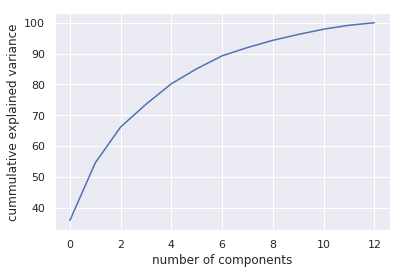

In [21]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100.)
plt.xlabel('number of components')
plt.ylabel('cummulative explained variance');

***

In [34]:
res = pca.transform(X_train_sc)
index_name = ['PCA '+str(k) for k in range(1, len(res)+1)]

In [35]:
index_name

['PCA 1',
 'PCA 2',
 'PCA 3',
 'PCA 4',
 'PCA 5',
 'PCA 6',
 'PCA 7',
 'PCA 8',
 'PCA 9',
 'PCA 10',
 'PCA 11',
 'PCA 12',
 'PCA 13',
 'PCA 14',
 'PCA 15',
 'PCA 16',
 'PCA 17',
 'PCA 18',
 'PCA 19',
 'PCA 20',
 'PCA 21',
 'PCA 22',
 'PCA 23',
 'PCA 24',
 'PCA 25',
 'PCA 26',
 'PCA 27',
 'PCA 28',
 'PCA 29',
 'PCA 30',
 'PCA 31',
 'PCA 32',
 'PCA 33',
 'PCA 34',
 'PCA 35',
 'PCA 36',
 'PCA 37',
 'PCA 38',
 'PCA 39',
 'PCA 40',
 'PCA 41',
 'PCA 42',
 'PCA 43',
 'PCA 44',
 'PCA 45',
 'PCA 46',
 'PCA 47',
 'PCA 48',
 'PCA 49',
 'PCA 50',
 'PCA 51',
 'PCA 52',
 'PCA 53',
 'PCA 54',
 'PCA 55',
 'PCA 56',
 'PCA 57',
 'PCA 58',
 'PCA 59',
 'PCA 60',
 'PCA 61',
 'PCA 62',
 'PCA 63',
 'PCA 64',
 'PCA 65',
 'PCA 66',
 'PCA 67',
 'PCA 68',
 'PCA 69',
 'PCA 70',
 'PCA 71',
 'PCA 72',
 'PCA 73',
 'PCA 74',
 'PCA 75',
 'PCA 76',
 'PCA 77',
 'PCA 78',
 'PCA 79',
 'PCA 80',
 'PCA 81',
 'PCA 82',
 'PCA 83',
 'PCA 84',
 'PCA 85',
 'PCA 86',
 'PCA 87',
 'PCA 88',
 'PCA 89',
 'PCA 90',
 'PCA 91',
 'PCA 92

In [36]:
df1 = pd.DataFrame(res, columns=df.columns[1:],
                   index=index_name)[:12]
df1.T.sort_values(by='PCA 1')

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8,PCA 9,PCA 10,PCA 11,PCA 12
Malic acid,-3.615327,-0.482177,1.275033,-2.496962,0.688203,2.225773,2.004699,0.202558,-0.350467,-1.194808,2.369147,0.791750
Alcohol,-1.166027,-3.862612,2.283538,-1.678507,1.572842,0.202555,0.883339,-0.715050,-2.315354,2.481817,0.927003,-1.105030
Proline,-0.755592,-0.122403,0.415850,-0.791136,0.353050,-0.047309,-0.331796,-0.217981,-0.332538,0.007792,0.209926,0.129512
Proanthocyanins,-0.639966,-0.005981,-0.481336,-0.121445,0.251356,-0.434503,-0.483237,-1.153828,-0.604990,1.278853,-0.065184,-0.184605
Flavanoids,-0.553745,1.257686,-0.979052,-0.666927,-0.078362,0.183285,-0.234952,0.277431,0.778538,0.296284,0.294200,0.403268
Hue,-0.112150,0.504570,0.480180,-0.319599,0.309145,-0.233613,-0.557362,0.101598,0.138492,-0.265687,1.044212,-0.034050
OD280/OD315 of diluted wines,0.071476,-0.182884,-0.458933,0.045823,-0.119233,-0.190320,0.272664,-0.916741,-0.284014,-0.131304,0.667370,-0.083020
Magnesium,0.221634,-0.226540,0.215798,-0.003420,-0.674013,0.689123,-0.303721,-1.649756,-0.507613,0.191238,0.291867,0.645024
Color intensity,0.262397,-0.453600,-0.777822,-0.123055,-0.275627,0.909094,0.166193,0.245809,-0.250217,-0.221972,-0.360658,0.348903
Nonflavanoid phenols,0.918085,-0.113136,-0.678263,0.150849,-0.127387,-0.200097,0.302700,-1.188509,0.362818,0.236359,0.142588,0.282260
